## Loan Eligibility Prediction 
Richmond Yeboah
### Introduction
This competition was developed for housing finance companies. To predict eligibility for home loans. The company plans to automate this process and needs real scenerios to solve this task. In this notebook we will take a look at some of the features and decisions made for loan eligibilty.

##### Loan_ID --------------> Unique Loan ID.
##### Gender --------------> Male/ Female
##### Married --------------> Applicant married (Y/N)
##### Dependents ------------> Number of dependents
##### Education -------------> Applicant Education (Graduate/ Under Graduate)
##### Self_Employed ---------> Self-employed (Y/N)
##### ApplicantIncome -------> Applicant income
##### CoapplicantIncome -----> Coapplicant income
##### LoanAmount -----------> Loan amount in thousands
##### Loan_Amount_Term ------> Term of a loan in months
##### Credit_History --------> Credit history meets guidelines
##### Property_Area ---------> Urban/ Semi-Urban/ Rural
##### Loan_Status -----------> Loan approved (Y/N)

In [1]:
# import packages
import numpy as np 
import pandas as pd 
import seaborn as sns 
from matplotlib import pyplot as plt

In [2]:
#Read the training and testing datasets
loan_train = pd.read_csv('datasets/loan-train.csv')
loan_test = pd.read_csv('datasets/loan-test.csv')

In [3]:
loan_train.head(9) #view the first 9 rows

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y


In [4]:
print("Shape : ", loan_train.shape) # count each column and row

Shape :  (614, 13)


### Understanding the data

In [5]:
loan_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [6]:
loan_train.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [7]:
# List which columns have missing values
loan_train.isnull().any()

Loan_ID              False
Gender                True
Married               True
Dependents            True
Education            False
Self_Employed         True
ApplicantIncome      False
CoapplicantIncome    False
LoanAmount            True
Loan_Amount_Term      True
Credit_History        True
Property_Area        False
Loan_Status          False
dtype: bool

In [8]:
# List the number of missing values in each collum
loan_train.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [9]:
loan_train_columns = loan_train.columns # assign to a variable
loan_train_columns # print the list of columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [10]:
def explore_object_type(df ,feature_name):
    """
    Check, How many values available in object('categorical') type of features
    And Return Categorical values with Count.
    """    
    if df[feature_name].dtype ==  'object':
        print(df[feature_name].value_counts())

#### Here we check how many types of categorical values are in each column.

In [11]:
for featureName in loan_train_columns:
    if loan_train[featureName].dtype == 'object':
        print('\n"' + str(featureName) + '\'s" Values with count are :')
        explore_object_type(loan_train, str(featureName))


"Loan_ID's" Values with count are :
LP002738    1
LP001028    1
LP001137    1
LP002284    1
LP001164    1
           ..
LP001758    1
LP002502    1
LP001580    1
LP002941    1
LP002277    1
Name: Loan_ID, Length: 614, dtype: int64

"Gender's" Values with count are :
Male      489
Female    112
Name: Gender, dtype: int64

"Married's" Values with count are :
Yes    398
No     213
Name: Married, dtype: int64

"Dependents's" Values with count are :
0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

"Education's" Values with count are :
Graduate        480
Not Graduate    134
Name: Education, dtype: int64

"Self_Employed's" Values with count are :
No     500
Yes     82
Name: Self_Employed, dtype: int64

"Property_Area's" Values with count are :
Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64

"Loan_Status's" Values with count are :
Y    422
N    192
Name: Loan_Status, dtype: int64


In [12]:
# !pip install missingno
import missingno as msno 
#fill null values with mean and median using missingno package

In [13]:
loan_train['Credit_History'].fillna(loan_train['Credit_History'].mode(), inplace=True) 
loan_test['Credit_History'].fillna(loan_test['Credit_History'].mode(), inplace=True) 


loan_train['LoanAmount'].fillna(loan_train['LoanAmount'].mean(), inplace=True) 
loan_test['LoanAmount'].fillna(loan_test['LoanAmount'].mean(), inplace=True) 

In [14]:
# Converting the categorical datatypes into numerical datatypes
loan_train.Loan_Status = loan_train.Loan_Status.replace({"Y": 1, "N" : 0})

loan_train.Gender = loan_train.Gender.replace({"Male": 1, "Female" : 0})
loan_test.Gender = loan_test.Gender.replace({"Male": 1, "Female" : 0})

loan_train.Married = loan_train.Married.replace({"Yes": 1, "No" : 0})
loan_test.Married = loan_test.Married.replace({"Yes": 1, "No" : 0})

loan_train.Self_Employed = loan_train.Self_Employed.replace({"Yes": 1, "No" : 0})
loan_test.Self_Employed = loan_test.Self_Employed.replace({"Yes": 1, "No" : 0})

In [15]:
loan_train['Gender'].fillna(loan_train['Gender'].mode()[0], inplace=True)
loan_test['Gender'].fillna(loan_test['Gender'].mode()[0], inplace=True)

loan_train['Dependents'].fillna(loan_train['Dependents'].mode()[0], inplace=True)
loan_test['Dependents'].fillna(loan_test['Dependents'].mode()[0], inplace=True)

loan_train['Married'].fillna(loan_train['Married'].mode()[0], inplace=True)
loan_test['Married'].fillna(loan_test['Married'].mode()[0], inplace=True)

loan_train['Credit_History'].fillna(loan_train['Credit_History'].mean(), inplace=True)
loan_test['Credit_History'].fillna(loan_test['Credit_History'].mean(), inplace=True)


In [16]:
loan_train.head(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1.0,0.0,0,Graduate,0.0,5849,0.0,146.412162,360.0,1.0,Urban,1
1,LP001003,1.0,1.0,1,Graduate,0.0,4583,1508.0,128.000000,360.0,1.0,Rural,0
2,LP001005,1.0,1.0,0,Graduate,1.0,3000,0.0,66.000000,360.0,1.0,Urban,1
3,LP001006,1.0,1.0,0,Not Graduate,0.0,2583,2358.0,120.000000,360.0,1.0,Urban,1
4,LP001008,1.0,0.0,0,Graduate,0.0,6000,0.0,141.000000,360.0,1.0,Urban,1


In [17]:
# Making the categorical variables numerical 
from sklearn.preprocessing import LabelEncoder
feature_col = ['Property_Area','Education', 'Dependents']
le = LabelEncoder()
for col in feature_col:
    loan_train[col] = le.fit_transform(loan_train[col])
    loan_test[col] = le.fit_transform(loan_test[col])

### Data Visualizations

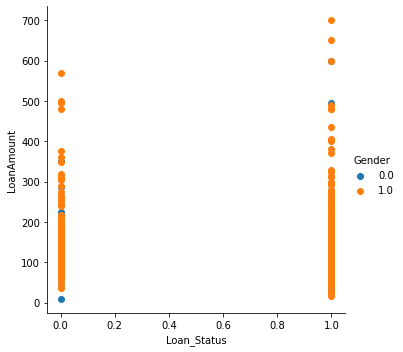

In [18]:
# Male's = 1
# Female = 0
sns.FacetGrid(loan_train, hue='Gender', height=5) \
.map(plt.scatter,"Loan_Status","LoanAmount") \
.add_legend()
plt.show()

#### Men seem to a greater loan amount than Women.

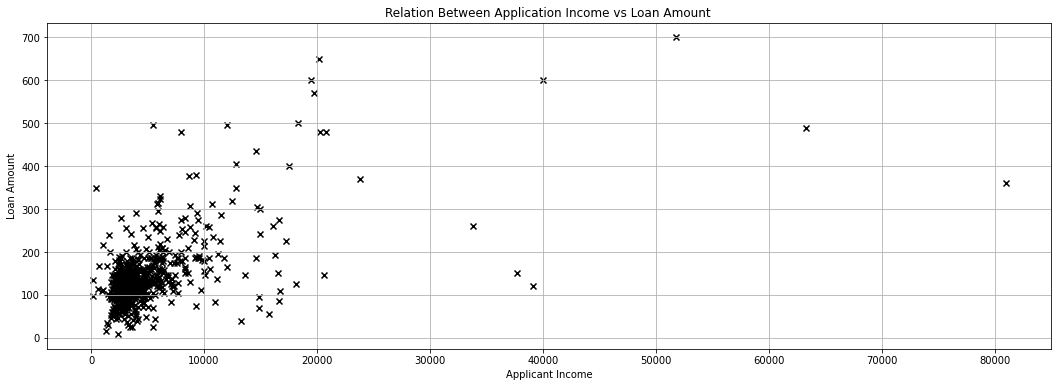

In [19]:
plt.figure(figsize=(18, 6))
plt.title("Relation Between Application Income vs Loan Amount ")

plt.grid()
plt.scatter(loan_train['ApplicantIncome'] , loan_train['LoanAmount'], c='k', marker='x')
plt.xlabel("Applicant Income")
plt.ylabel("Loan Amount")
plt.show()

#### On average the mean loan amounts that were accepted were between 0 and 10,000.

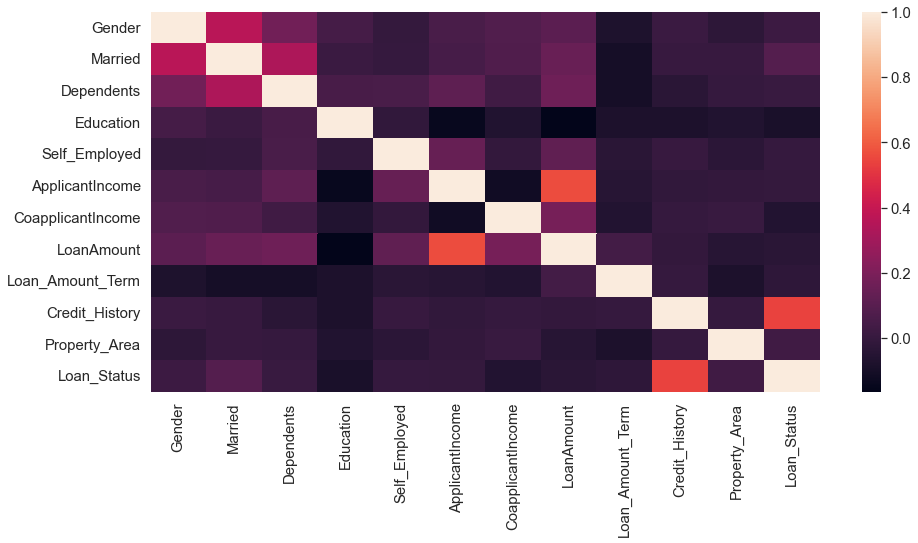

In [20]:
# Correlation matrix based on all the features and our collumn variables
sns.set(rc = {'figure.figsize':(15,7)})
sns.set(font_scale = 1.35)
sns.heatmap(loan_train.corr());

#### There is great correlation between 4 variables: Income and Loan Amount, Credit history and loan status.

In [21]:
# Import Ml model from sklearn pacakge

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

logistic_model = LogisticRegression()

### Training the model 

In [22]:
train_features = ['Credit_History', 'Education', 'Gender']

x_train = loan_train[train_features].values
y_train = loan_train['Loan_Status'].values

x_test = loan_test[train_features].values

logistic_model.fit(x_train, y_train)

LogisticRegression()

### Predict Model

In [23]:
# Predict the model for testin data
predicted = logistic_model.predict(x_test)

In [24]:
# check the coefficeints of the trained model
print('Coefficient of model :', logistic_model.coef_)

Coefficient of model : [[ 3.316164   -0.3059193   0.09398266]]


In [25]:
print('Intercept of model',logistic_model.intercept_)

Intercept of model [-1.98307795]


In [26]:
# Accuray Score on train dataset
# accuracy_train = accuracy_score(x_test, predicted)
score = logistic_model.score(x_train, y_train)
print('accuracy_score overall :', score)
print('accuracy_score percent :', round(score*100,2))

accuracy_score overall : 0.8094462540716613
accuracy_score percent : 80.94


In [27]:
predict_test = logistic_model.predict(x_test)
print('Target on test data',predict_test) 
#1 represents that the customer is eligible and 0 ineligble.

Target on test data [1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 0 1 1 0 0 1 0 1 1 1 1
 1 1 1 1 1 1 0 1 0 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1
 1 1 1 1 1 1 0 0 0 1 1 1 0 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 0
 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 0 0 1 0 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 0 0 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1
 1 1 0 1 1 1 1 0 1 1 1 1 1 0 0 1 1 1 1 0 1 0 1 0 1 1 1 1 0 1 1 1 1 0 1 1 1
 1 1 1 1 1 1 1 0 1 0 1 1 1 1 0 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1
 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1
 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1]


## Conclusion

According to this dataset there are 4 major features used to calculate loan eligibility: Income and Loan Amount, Credit history and loan status. Men seem to a greater loan amount than Women. We may suggest most men in this dataset make more average salary than women.

Source: Dataset https://www.kaggle.com/ajaymanwani/loan-approval-prediction/data
        